## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [7]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [9]:
# Get dataset structure and info
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [11]:
# Display summary statistics
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [12]:
# List of columns to replace 0 with NaN
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN in the specified columns
diabetes_data[cols_with_missing] = diabetes_data[cols_with_missing].replace(0, np.nan)

# Confirm the changes by checking how many NaNs are in each column
diabetes_data[cols_with_missing].isnull().sum()

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


**<font color='teal'> Plot histograms of each column. </font>**

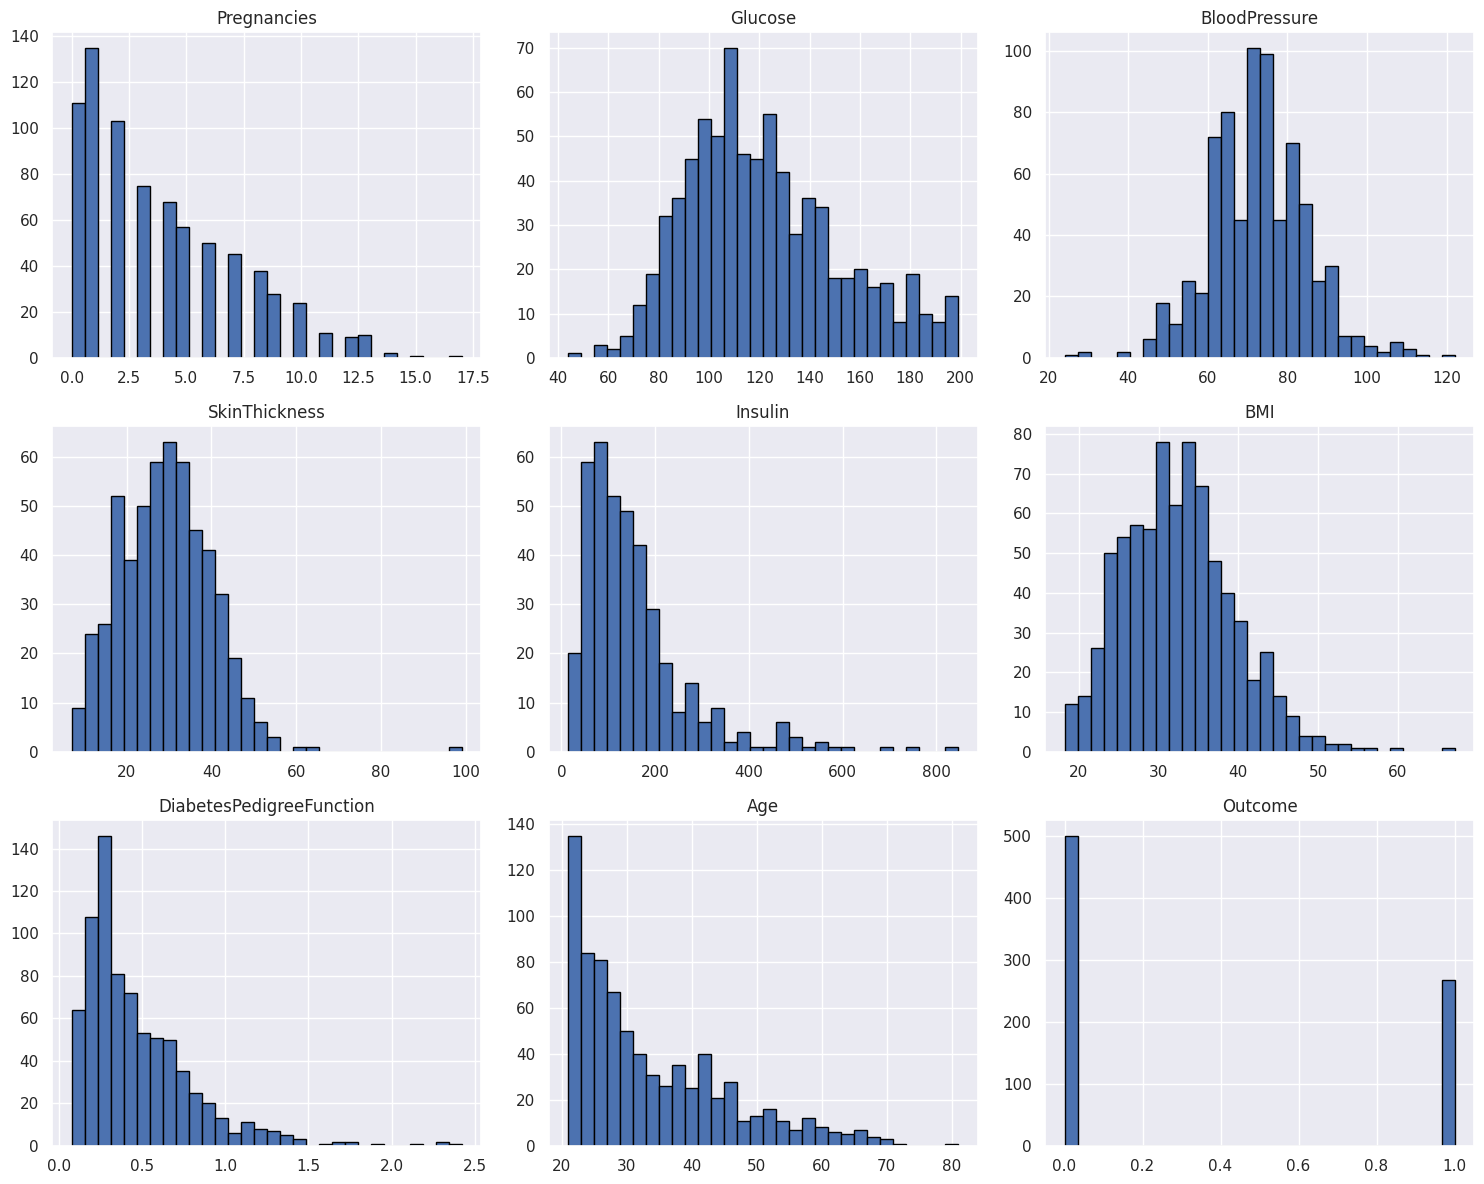

In [13]:
# Set figure size
diabetes_data.hist(figsize=(15, 12), bins=30, edgecolor='black')

# Adjust layout
plt.tight_layout()
plt.show()

#### Replace the zeros with mean and median values.

In [14]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

/tmp/ipython-input-2273347448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
/tmp/ipython-input-2273347448.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

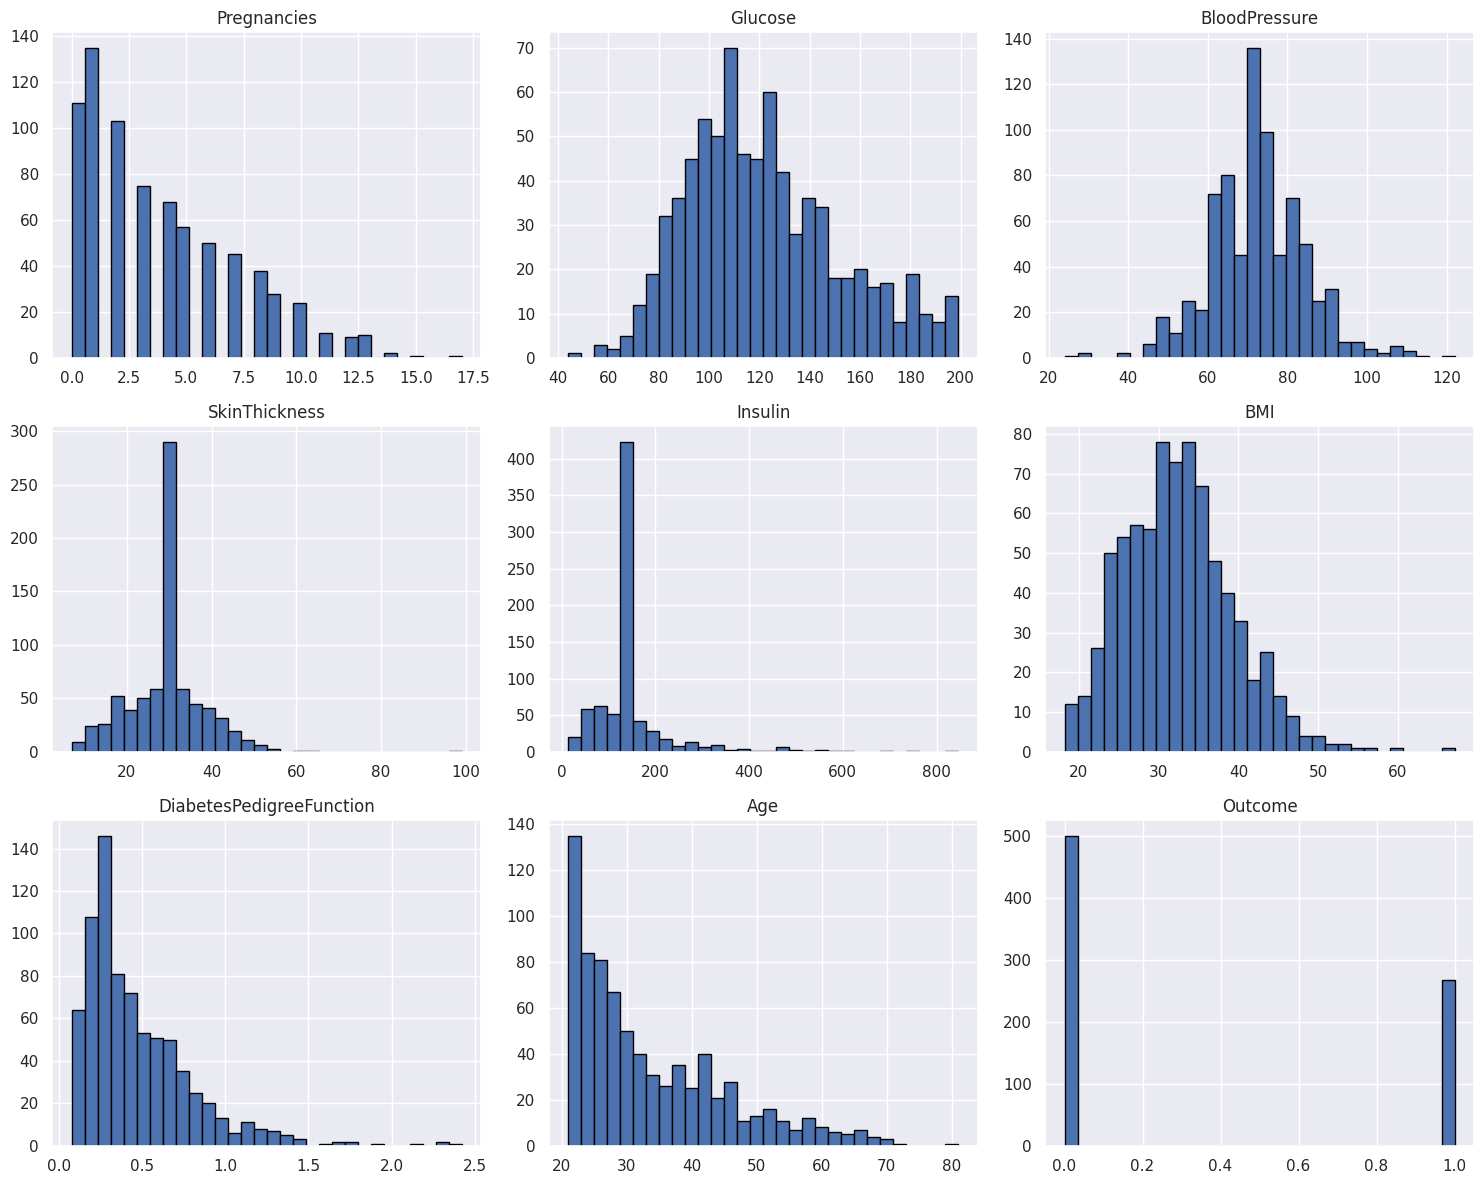

In [15]:
# Plot histograms after filling missing values
diabetes_data.hist(figsize=(15, 12), bins=30, edgecolor='black')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


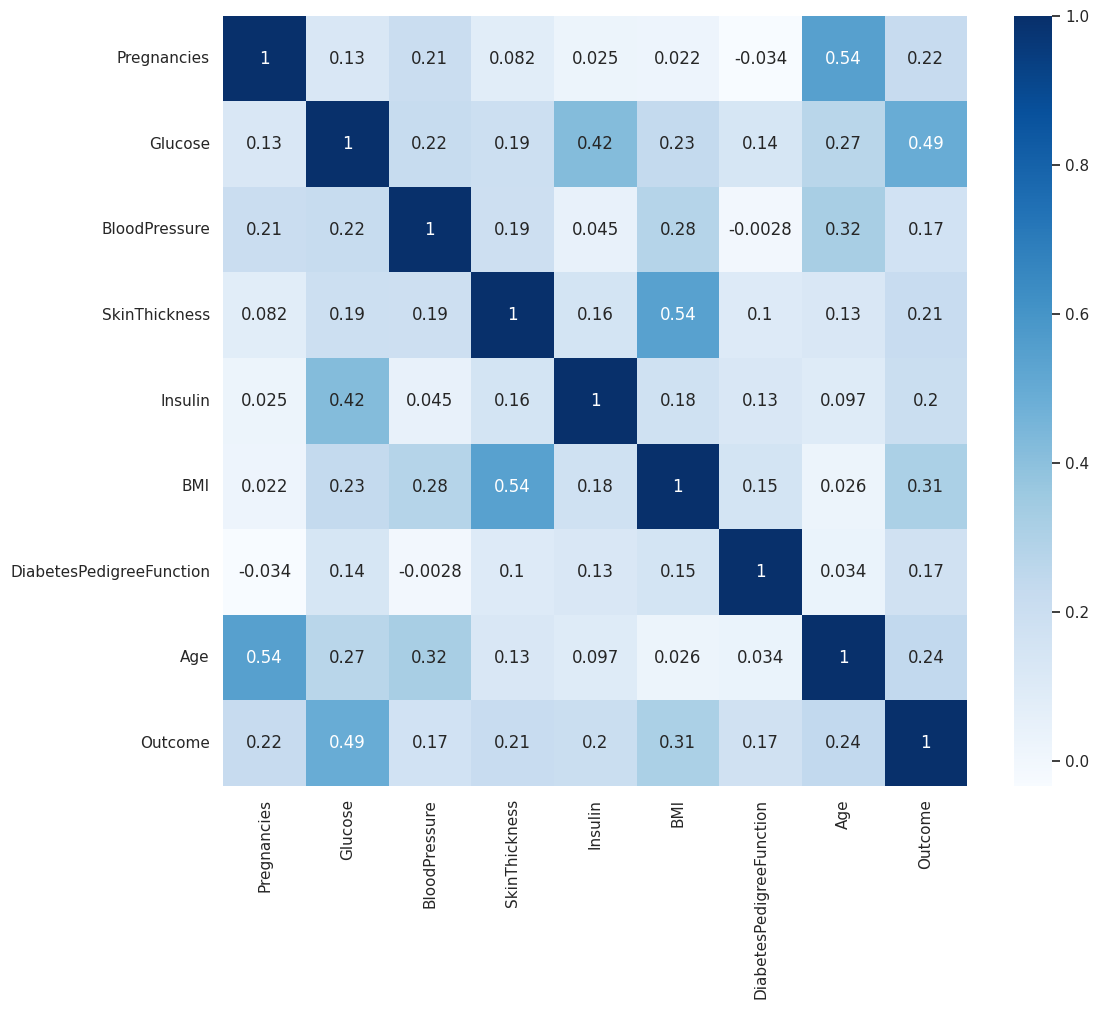

In [16]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [17]:
# Define the target variable
y = diabetes_data['Outcome']


# Define feature variables (drop the target)
X = diabetes_data.drop('Outcome', axis=1)


**<font color='teal'> Create a 70/30 train and test split. </font>**

In [18]:
from sklearn.model_selection import train_test_split

# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=random_seed_number, stratify=y
)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler (already fitted) to transform the test data
X_test_scaled = scaler.transform(X_test)


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [20]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

# Loop through neighbor values from 1 to 10
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_acc = knn.score(X_train_scaled, y_train)
    test_acc = knn.score(X_test_scaled, y_test)

    train_scores.append(train_acc)
    test_scores.append(test_acc)

    print(f'k={k}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}')

k=1: Train Accuracy = 1.0000, Test Accuracy = 0.7186
k=2: Train Accuracy = 0.8436, Test Accuracy = 0.7229
k=3: Train Accuracy = 0.8622, Test Accuracy = 0.7403
k=4: Train Accuracy = 0.8287, Test Accuracy = 0.7403
k=5: Train Accuracy = 0.8343, Test Accuracy = 0.7446
k=6: Train Accuracy = 0.8101, Test Accuracy = 0.7403
k=7: Train Accuracy = 0.8063, Test Accuracy = 0.7359
k=8: Train Accuracy = 0.8063, Test Accuracy = 0.7489
k=9: Train Accuracy = 0.8007, Test Accuracy = 0.7446
k=10: Train Accuracy = 0.8101, Test Accuracy = 0.7359


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [22]:
import numpy as np

# Find the index of the max training score
best_k_index = np.argmax(train_scores)

# Remember index is zero-based, so add 1 to get k value
best_k = best_k_index + 1

print(f"The number of neighbors with the highest training accuracy is: {best_k}")
print(f"Highest training accuracy: {train_scores[best_k_index]:.4f}")

The number of neighbors with the highest training accuracy is: 1
Highest training accuracy: 1.0000


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [23]:
import numpy as np

# Find the index of the max test score
best_k_test_index = np.argmax(test_scores)

# Convert zero-based index to k value
best_k_test = best_k_test_index + 1

print(f"The number of neighbors with the highest test accuracy is: {best_k_test}")
print(f"Highest test accuracy: {test_scores[best_k_test_index]:.4f}")

The number of neighbors with the highest test accuracy is: 8
Highest test accuracy: 0.7489


Plot the train and test model performance by number of neighbors.

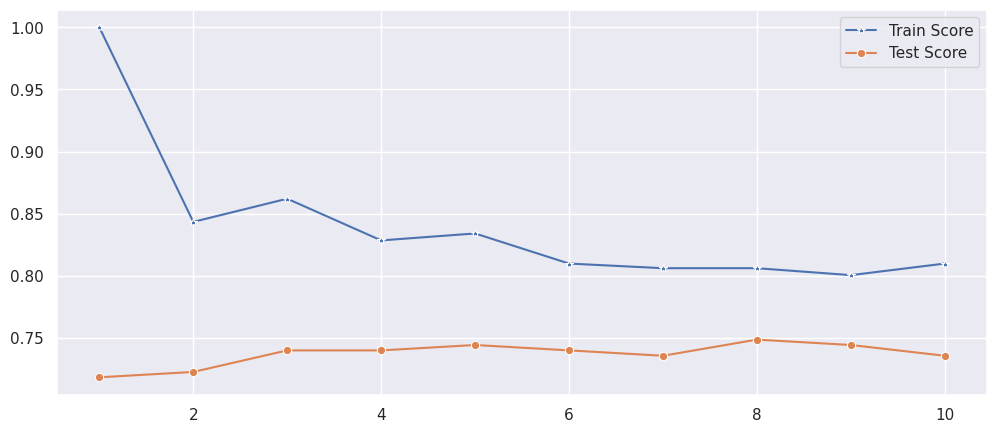

In [26]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,11), y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,11), y=test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Identify the best k based on test scores
best_k_index = np.argmax(test_scores)
best_k = best_k_index + 1

print(f"Best number of neighbors based on test accuracy: {best_k}")

# Step 2: Fit the KNN model with best_k on scaled training data
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Step 3: Score on training and testing sets
train_accuracy = knn_best.score(X_train_scaled, y_train)
test_accuracy = knn_best.score(X_test_scaled, y_test)

print(f"Train Accuracy with k={best_k}: {train_accuracy:.4f}")
print(f"Test Accuracy with k={best_k}: {test_accuracy:.4f}")


Best number of neighbors based on test accuracy: 8
Train Accuracy with k=8: 0.8063
Test Accuracy with k=8: 0.7489


In [28]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

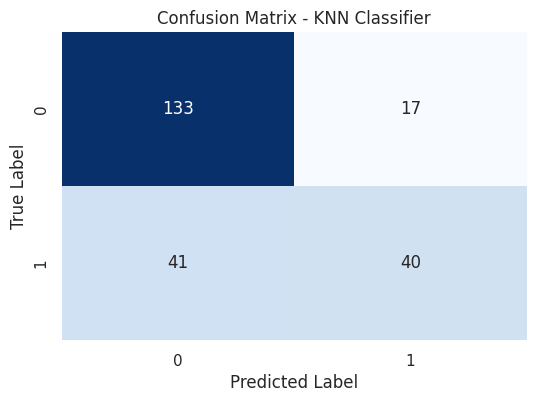

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on scaled test data
y_pred = knn_best.predict(X_test_scaled)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN Classifier')
plt.show()

**<font color='teal'> Print the classification report </font>**

In [31]:
from sklearn.metrics import classification_report

# Predict on scaled test data
y_pred = knn_best.predict(X_test_scaled)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       150
           1       0.70      0.49      0.58        81

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [33]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': np.int64(31)}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed.

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialize the model
rf = RandomForestClassifier(random_state=random_seed_number)

# Define the grid of n_estimators to search
param_grid = {'n_estimators': np.arange(10, 201, 10)}  # From 10 to 200 in steps of 10

# Setup GridSearchCV with 5-fold cross-validation
rf_cv = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# Fit grid search on the training data (no scaling needed for Random Forest)
rf_cv.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best number of estimators: {rf_cv.best_params_['n_estimators']}")
print(f"Best cross-validation accuracy: {rf_cv.best_score_:.4f}")


Best number of estimators: 40
Best cross-validation accuracy: 0.7673
